In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('cleanpitcherdataset.csv', index_col=0)
pd.set_option('display.max_columns', 500)


# Ho: u_FB=u_SL=u_CB=u_CH
# Ha: Ho is not true

In [12]:
FB=df.loc[df['Best_Pitch']=='FB','SO']
CH=df.loc[df['Best_Pitch']=='CH','SO']
CB=df.loc[df['Best_Pitch']=='CB','SO']
SL=df.loc[df['Best_Pitch']=='SL','SO']

In [13]:
stats.f_oneway(FB,CH,CB,SL)

F_onewayResult(statistic=12.511918036654835, pvalue=4.6617105462062683e-08)

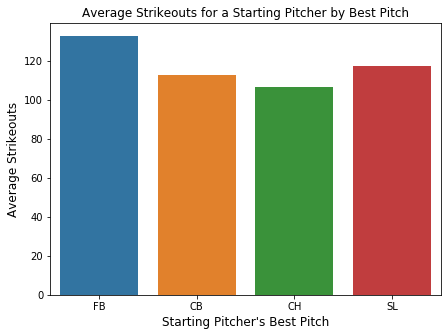

In [27]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['FB','CB','CH', 'SL'],y=[FB.mean(), CB.mean(), CH.mean(), SL.mean()], ax=ax)
ax.set_xlabel("Starting Pitcher's Best Pitch", fontsize=12)
ax.set_ylabel("Average Strikeouts", fontsize=12)
ax.set_title('Average Strikeouts for a Starting Pitcher by Best Pitch')
fig.savefig("Average Strikeouts for a Starting Pitcher by Best Pitch.png")
ax;



# Assuming a threshold of .05, our F-statistic of 12.51 and our p-value of 10^-8 allows us to reject the null hypothesis that Best Pitch does not affect average strikeouts for a starting pitcher. This allows us to conclude that a pitcher's Best Pitch directly affects how many strikeouts they will obtain in a season.

## Ho: u_pop = u_fstrike95
## Ha: u_pop != u_fstrike95

In [34]:
u_pop = df[(df['IP'] > 134.0) & (df['FBv'] >= 95.0)]['SO'].mean()
std_pop = df[(df['IP'] > 134.0) & (df['FBv'] >= 95.0)]['SO'].std()


In [35]:
u_fstrike95 = df[(df['F-Strike%'] > .635) & (df['IP'] > 134.0) & (df['FBv'] >= 95.0)]['SO'].mean()
std_fstrike95 = df[(df['F-Strike%'] > .635) & (df['IP'] > 134.0) & (df['FBv'] >= 95.0)]['SO'].std()

In [36]:
len_fstrike95 = len(df[(df['F-Strike%'] > .635) & (df['IP'] > 134.0) & (df['FBv'] >= 95.0)]['SO'])

In [37]:
num = u_pop - u_fstrike95
denom = std_pop/np.sqrt(len_fstrike95)
t_stat = num / denom
t_stat

-2.604678248974154

In [38]:
p_val = (stats.norm.cdf(t_stat))/2

In [39]:
p_val

0.002299014319769304

## At a significance level of .05, our threshold would be .025 in each tail. Our p-value of .002 is less than .025, thereby we reject the null hypothesis that the sample and population means are equal. Therefore, there is a statistically significant difference between these two groups. Our conclusion from these findings is that controlling for high fastball velocity, a pitcher's First Strike percentage has a strong impact on the amount of strikeouts they obtain in a year. We recommend that General Managers seek pitchers that not only have elite fastball velocity (above 95mph), but that also have an elite First Strike Percentage (above .635).